In [1]:
# !pip install dataframe-image

In [2]:
# !pip install tabulate

Carrega os catalogos do gammapy

Verifica a existencia da fonte em cada um dos catalgos

Guarda a tabela dos pontos de fluxos

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from gammapy.datasets import FluxPointsDataset, Datasets
from gammapy.catalog import CATALOG_REGISTRY

In [5]:
import os
import sys
import importlib

module_path = os.path.abspath('modules/spectral_models')
if module_path not in sys.path:
    sys.path.append(module_path)
# print(module_path)
import spectral_models
importlib.reload(spectral_models)
from spectral_models import pwl_model, get_source_data

module_path = os.path.abspath('modules/utilities')
if module_path not in sys.path:
    sys.path.append(module_path)
# print(module_path)
import utilities
importlib.reload(utilities)
from utilities import mkdir_child_dir

In [6]:
from astropy import units as u

from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)

In [7]:
def print_SED(spec_model = None, sed_type = "e2dnde", yaxis_units="TeV cm-2 s-1", energy_bounds= [1e-5, 1e2] * u.TeV, ylim = [1e-13, 1e-9]):
    '''Returns a spectral energy distribution
    
    print_SED(spec_model, yaxis_units, sed_type, reference)
    >>> model 
    ----------
    '''
    path, path_name=mkdir_child_dir("catalogs_data", "flux_points_images")
    ax = plt.subplot()
    ax.yaxis.set_units(u.Unit(yaxis_units))
    ax.xaxis.set_units(u.Unit("TeV"))

    #label = f"{sky_model}"
    
    kwargs = {
        "ax": ax, 
        "sed_type": sed_type
    }    
    for d in datasets:
        d.data.plot(label=d.name, **kwargs)

    try:   
        kwargs_fit = {"label":sky_model.name}
        spec_model.plot(energy_bounds=energy_bounds, color="k", **kwargs, **kwargs_fit)
        spec_model.plot_error(energy_bounds=energy_bounds, **kwargs)
        file = path_name / f'{LHAASO_id}_{source_id}_{sky_model.name}.png'
    except:
        file = path_name / f'{LHAASO_id}_{source_id}.png'
    
    ax.set_ylim(ylim)
    ax.set_xlim(energy_bounds)
    ax.legend()
    
    plt.title(f"{LHAASO_name}: {source_name}")
        
    plt.savefig(file, bbox_inches='tight')
    plt.show()
    
    return 

In [8]:
print(CATALOG_REGISTRY)

Registry
--------

SourceCatalogGammaCat: gamma-cat 
SourceCatalogHGPS    : hgps 
SourceCatalog2HWC    : 2hwc 
SourceCatalog3FGL    : 3fgl 
SourceCatalog4FGL    : 4fgl 
SourceCatalog2FHL    : 2fhl 
SourceCatalog3FHL    : 3fhl 
SourceCatalog3HWC    : 3hwc 



In [9]:
catalog_tags = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 

In [10]:
# Loading the source catalogs
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()
catalog_hgps = CATALOG_REGISTRY.get_cls("hgps")()
catalog_2hwc = CATALOG_REGISTRY.get_cls("2hwc")()
catalog_3fgl = CATALOG_REGISTRY.get_cls("3fgl")()
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()
catalog_2fhl = CATALOG_REGISTRY.get_cls("2fhl")()
catalog_3fhl = CATALOG_REGISTRY.get_cls("3fhl")()
catalog_3hwc = CATALOG_REGISTRY.get_cls("3hwc")()

In [11]:
# Creating a dictionary of the Potential TeV Counterparts (dict values) of the three most significant (excluding Crab)LHASSO observations (dict keys)# see https://www.nature.com/articles/s41586-021-03498-z
dict_lhaaso_tevc = {
    "LHAASO J1825-1326": ["HESS J1825-137", "HESS J1826-130", "2HWC J1825-134"], 
    "LHAASO J1908+0621": ["MGRO J1908+06" , "HESS J1908+063", "ARGO J1907+0627", "VER J1907+062", "2HWC J1908+063"], 
    "LHAASO J2226+6057": ["VER J2227+608"  , "Boomerang"]
}

In [12]:
path_par, path_dir = mkdir_child_dir("catalogs_data", "flux_points_table")

df, ds_lst = get_source_data(dict_lhaaso_tevc, catalog_tags, path_dir)

Directory 'catalogs_data/flux_points_table' created


In [13]:
df

,LHAASO,TeV Conterpart,Catalog,Flux Points,ds,src
0,LHAASO J1825-1326,HESS J1825-137,"[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]","[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]",[FluxPointsDataset\n-----------------\n\n Nam...,"[{'source_id': 118, 'common_name': 'HESS J1825..."
1,LHAASO J1825-1326,HESS J1826-130,"[gamma-cat, hgps, 4fgl, 3fhl]","[gamma-cat, hgps, 4fgl, 3fhl]",[FluxPointsDataset\n-----------------\n\n Nam...,"[{'source_id': 161, 'common_name': 'HESS J1826..."
2,LHAASO J1825-1326,2HWC J1825-134,[2hwc],[],[],"[{'source_name': '2HWC J1825-134', 'ra': 276.4..."
3,LHAASO J1908+0621,MGRO J1908+06,"[gamma-cat, 3fgl, 4fgl]","[gamma-cat, 3fgl, 4fgl]",[FluxPointsDataset\n-----------------\n\n Nam...,"[{'source_id': 132, 'common_name': 'MGRO J1908..."
4,LHAASO J1908+0621,HESS J1908+063,"[gamma-cat, hgps]","[gamma-cat, hgps]",[FluxPointsDataset\n-----------------\n\n Nam...,"[{'source_id': 132, 'common_name': 'MGRO J1908..."
5,LHAASO J1908+0621,ARGO J1907+0627,[gamma-cat],[gamma-cat],[FluxPointsDataset\n-----------------\n\n Nam...,"[{'source_id': 132, 'common_name': 'MGRO J1908..."
6,LHAASO J1908+0621,VER J1907+062,[gamma-cat],[gamma-cat],[FluxPointsDataset\n-----------------\n\n Nam...,"[{'source_id': 132, 'common_name': 'MGRO J1908..."
7,LHAASO J1908+0621,2HWC J1908+063,[2hwc],[],[],"[{'source_name': '2HWC J1908+063', 'ra': 287.0..."
8,LHAASO J2226+6057,VER J2227+608,[],[],[],[]
9,LHAASO J2226+6057,Boomerang,"[3fgl, 4fgl]","[3fgl, 4fgl]",[FluxPointsDataset\n-----------------\n\n Nam...,"[{'Source_Name': '3FGL J2229.0+6114 ', 'RAJ200..."


####### 


In [14]:
# to select a source object index
src_index = 0

In [15]:
LHAASO_id = df["LHAASO"][src_index].replace(" ", "")

In [16]:
source_id = df["TeV Conterpart"][src_index].replace(" ", "")

In [17]:
ds_lst[src_index]

In [18]:
catalog_tag = catalog_tags[4]

In [19]:
file_name = f'{LHAASO_id}_{source_id}_{catalog_tag}.fits'

In [20]:
file_name

'LHAASOJ1825-1326_HESSJ1825-137_4fgl.fits'

In [21]:
# from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path
# path_flux_points = '/home/gamma/Documents/GitHub/gammapy/gammapy-notebooks/0.20.1/simulations/LHAASO/catalogs_data/flux_points'
filename = make_path(f'{path_dir}/{file_name}')

# table.write(filename,format=format_type, overwrite=True)
filename

PosixPath('catalogs_data/flux_points_table/LHAASOJ1825-1326_HESSJ1825-137_4fgl.fits')

In [22]:
flux_unit = u.erg / (u.cm**2 * u.s)
energy_unit = u.TeV

In [23]:
flux_points = FluxPoints.read(filename)
flux_points.to_table()

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


e_ref,e_min,e_max,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,sqrt_ts,is_ul
MeV,MeV,MeV,MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
70.71067811865478,49.99999999999999,100.00000000000004,0.032818595015253166,39.504709932181726,nan,79.04223861809604,0.0,True
173.20508075688775,100.00000000000004,299.99999999999994,0.2081885124546636,15.344609464122158,nan,30.897408543825577,0.0,True
547.722557505166,299.99999999999994,999.9999999999998,4.32498564437942,3.5155869846878236,3.572627865089459,nan,1.2146629,False
1732.0508075688763,999.9999999999998,2999.9999999999977,7.990703631890637,1.5610843217601464,1.5443028406399781,nan,5.217925,False
5477.225575051666,2999.9999999999977,10000.00000000001,15.401721896861199,1.3937241742379425,1.3937241742379425,nan,11.553127,False
17320.50807568877,10000.00000000001,30000.000000000007,21.23645547550675,1.902212544807774,1.902212544807774,nan,12.197048,False
54772.255750516626,30000.000000000007,100000.00000000001,29.92269676576556,2.7781173891170416,2.7781173891170416,nan,12.737162,False
316227.7660168382,100000.00000000001,999999.9999999995,36.47185846402396,4.030735591367832,3.856327331918009,nan,12.315137,False


In [27]:
flux_points.energy_ref.to(u.TeV)

<Quantity [7.07106781e-05, 1.73205081e-04, 5.47722558e-04, 1.73205081e-03,
           5.47722558e-03, 1.73205081e-02, 5.47722558e-02, 3.16227766e-01] TeV>

"QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ

In [28]:
import numpy as np
flux_points_new = np.zeros(len(flux_points.to_table()), dtype=bool)
for k, e_ref in enumerate(flux_points.energy_ref):
    if e_ref > 1e-3 * u.Unit("TeV"):
        flux_points_new[k] = True
        print(f"{e_ref}")

1732.0508075688763 MeV
5477.225575051666 MeV
17320.50807568877 MeV
54772.255750516626 MeV
316227.7660168382 MeV


In [29]:
flux_points_new

array([False, False, False,  True,  True,  True,  True,  True])

In [31]:
catalog_3fhl_bright = flux_points.to_table()[flux_points_new]
print(catalog_3fhl_bright)

      e_ref              e_min              e_max        ...  sqrt_ts  is_ul
       MeV                MeV                MeV         ...                
------------------ ------------------ ------------------ ... --------- -----
1732.0508075688763  999.9999999999998 2999.9999999999977 ...  5.217925 False
 5477.225575051666 2999.9999999999977  10000.00000000001 ... 11.553127 False
 17320.50807568877  10000.00000000001 30000.000000000007 ... 12.197048 False
54772.255750516626 30000.000000000007 100000.00000000001 ... 12.737162 False
 316227.7660168382 100000.00000000001  999999.9999999995 ... 12.315137 False


In [32]:
type(catalog_3fhl_bright)

astropy.table.table.Table

In [89]:
type(flux_points1.dnde)

gammapy.maps.region.ndmap.RegionNDMap

In [34]:
type(flux_points.dnde)

gammapy.maps.region.ndmap.RegionNDMap

In [35]:
flux_points1 = FluxPoints.from_table(catalog_3fhl_bright)


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


<AxesSubplot: xlabel='Energy [MeV]', ylabel='e2dnde [erg / (cm2 s)]'>

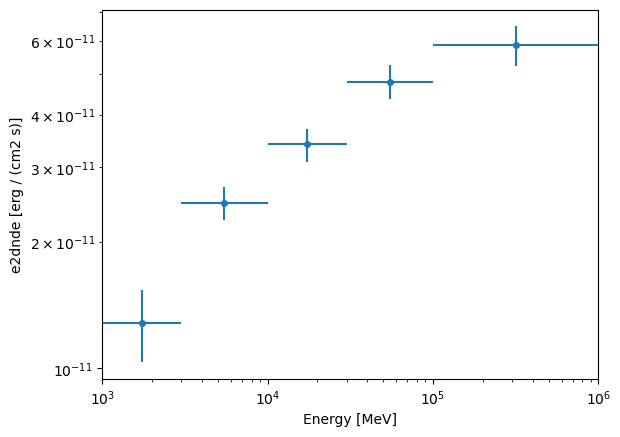

In [37]:
flux_points1.plot(sed_type="e2dnde") 


In [ ]:
flux_points.plot() 


In [ ]:
sed_type="e2dnde"


energy_bounds = [1e-7, 1e2] * energy_unit
ylim = [1e-20, 1e-9]
yaxis_units= flux_unit

# flux_points = FluxPoints.read(filename)
flux_points = ds_lst[4][0].data

ax = plt.subplot()
ax.yaxis.set_units(u.Unit(yaxis_units))
ax.xaxis.set_units(u.Unit(energy_unit))

kwargs = {
    "ax": ax, 
    "sed_type": sed_type
}    

flux_points.plot(label=catalog_tag, **kwargs) 

ax.set_ylim(ylim)
ax.set_xlim(energy_bounds)
ax.legend()

plt.title(f"{LHAASO_id}: {source_id}")

# plt.savefig(file, bbox_inches='tight')
plt.show()

In [ ]:
# Setting the source to analasis {}
src_index = 3

LHAASO_name = list(dict(df["LHAASO"]).values())[src_index]
LHAASO_id = LHAASO_id.replace(" ", "")

source_name = list(dict(df["TeV Conterpart"]).values())[src_index]
source_id = source_name.replace(" ", "")

ds_src = ds_lst[src_index]
datasets = Datasets(ds_src)

In [ ]:
energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-13, 1e-9]
print_SED(sed_type = "e2dnde", yaxis_units="erg cm-2 s-1", energy_bounds=energy_bounds, ylim=ylim)

In [69]:
table = Table.read('J1825_KM2A_201209.dat' ,format='ascii', delimiter=' ', comment='#')


In [70]:
table

col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64
31600000000000.0,1.664e-11,5.2640001e-12,5.2640001e-12,6500000000000.0,8190000000000.0
50100000000000.0,6.9440001e-12,1.4784e-12,1.4784e-12,10300000000000.0,13000000000000.0
79400000000000.0,5.5200001e-12,6.5440001e-13,6.5440001e-13,16300000000000.0,20600000000000.0
126000000000000.0,3.8080001e-12,5.6160001e-13,5.6160001e-13,25900000000000.0,32600000000000.0
200000000000000.0,9.6000001e-13,3.9040001e-13,3.296e-13,41000000000000.0,51700000000000.0
316000000000000.0,3.7120001e-13,2.992e-13,2.384e-13,65000000000000.0,81900000000000.0
501000000000000.0,1.936e-13,3.5520001e-13,1.2416e-13,103000000000000.0,130000000000000.0


In [71]:
type()

astropy.table.column.Column

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


ValueError: Missing energy range definition, cannot convert to sed type 'flux'.

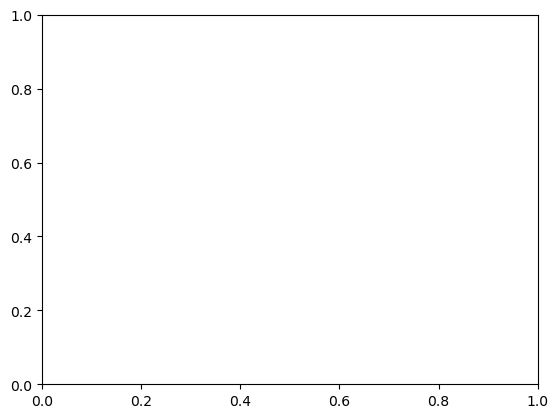

In [85]:
import numpy as np
from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.modeling.models import PowerLawSpectralModel
table2 = Table()
pwl = PowerLawSpectralModel()
table2["e_ref"] = table['col1']* u.TeV
table2["e2dnde"] = table['col2'] * u.erg/ (u.cm**2 * u.s)
table2["e2dnde_err"] = table['col3'] * u.erg/ (u.cm**2 * u.s)
table2.meta["SED_TYPE"] = "e2dnde"
flux_points = FluxPoints.from_table(table2)
flux_points.plot(sed_type="flux") 

In [53]:
table_src = FluxPoints.from_table(table, sed_type='e2dnde')


ValueError: Missing data / column for sed type 'e2dnde': {'e2dnde'}

In [47]:
table_src.plot(sed_type="e2dnde") 


AttributeError: 'Table' object has no attribute 'plot'

#########

In [ ]:
import pandas as pd 
from gammapy.datasets import FluxPointsDataset
from gammapy.catalog import CATALOG_REGISTRY
import os
import sys

# format_csv = ".csv"
format_fits = ".fits"

sed_type="e2dnde"

lst=[]
ds_lst = []

def get_source_data2(dict_lhaaso_tevc = dict_lhaaso_tevc, catalog_tags = catalog_tags):
    '''To write Docstring!!!!'''
    
    i_range = range(len(dict_lhaaso_tevc.keys()))
    for i in i_range:

        LHAASO_name = list(dict_lhaaso_tevc.keys())[i]
        LHAASO_id = LHAASO_name.replace(" ", "")
        
        j_range = range(len(dict_lhaaso_tevc[LHAASO_name]))
        for j in j_range:

            catalog_src = []

            pf_on = []
            src_on = []

            ds_j=[]

            source_name = dict_lhaaso_tevc[LHAASO_name][j]
            source_id = source_name.replace(" ", "")
            
            k_range = range(len(catalog_tags))
            for k in k_range: 
                
                catalog_tag = catalog_tags[k]
                catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()
                
                try:
                    
                    src = catalog[source_name]
                    src_on.append(src.data)
                    catalog_src.append(catalog_tag)
                    
                    ds = FluxPointsDataset(
                        data=src.flux_points, 
                        name=catalog_tag
                    )
                    
                    ds_j.append(ds)
                    pf_on.append(catalog_tag)

                    table = ds.data.to_table(
                        sed_type = sed_type, 
                        formatted = True
                    )

                    file_name = f'{LHAASO_id}_{source_id}_{catalog_tag}{format_fits}'
                    path_os = os.path.abspath(
                        os.path.join(
                            f"{path_dir}/{file_name}"
                        )
                    )
                    
                    
                    if path_os not in sys.path:
                        sys.path.append(path_os)

                    #table.write(f"{path_os}{format_csv}",format='ascii.ecsv', overwrite=True)
                    table.write(f"{path_os}",format='fits', overwrite=True)
                    
                except:
                    pass

                lst_k = [LHAASO_name, LHAASO_id, source_name, source_id, catalog_src, pf_on, ds_j, src_on]
            lst.append(lst_k)
            ds_lst.append(ds_j)

    df = pd.DataFrame(lst, columns =['LHAASO', "LHAASO_id",'SOURCE', "SOURCE_id", 'CATOLOG', 'FLUXPOINTS', 'DATASET', 'SOURCE_data']) 
    df.index.name='source_index'
    df.to_csv(f"{path_dir}/data_frame_flux_points.csv", index = "True" )
    return df, ds_lst

In [ ]:
df, ds_lst = get_source_data2(dict_lhaaso_tevc, catalog_tags)

In [ ]:
df

In [ ]:
df_n = df.drop(labels=[2,7,8], axis=0)
df_n=df_n.reset_index(drop=True)
df_n.index.name='source_index'

In [ ]:
df_n

In [ ]:
df_new

In [ ]:
# Setting the source to analasis {}
src_index = 0

LHAASO_obs = list(dict(df["LHAASO"]).values())[src_index]
LHAASO_id = LHAASO_obs.replace(" ", "")

TeVCount_src = list(dict(df["Source"]).values())[src_index]
TeVCount_id = TeVCount_src.replace(" ", "")

ds_src = ds_lst[src_index]
datasets = Datasets(ds_src)

In [ ]:
datasets[1]

In [ ]:
type()

In [ ]:
ds_lst[1][1].data.to_table()

In [ ]:
print(ds_lst[1][1].data.plot())

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


ValueError: Missing energy range definition, cannot convert to sed type 'flux'.

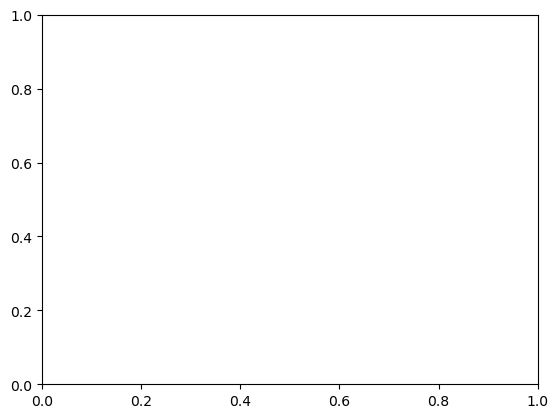

In [88]:
energy_bounds = [1e-7, 1e2] * u.TeV

import numpy as np
from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.modeling.models import PowerLawSpectralModel
table = Table()
pwl = PowerLawSpectralModel()
e_ref = np.geomspace(1, 100, 7) * u.TeV
table["e_ref"] = e_ref
table["dnde"] = pwl(e_ref)
table["dnde_err"] = pwl.evaluate_error(e_ref)[0]
table.meta["SED_TYPE"] = "dnde"
flux_points = FluxPoints.from_table(table)
flux_points.plot(energy_bounds=energy_bounds, sed_type="flux") 

In [ ]:
df['src'][1]

In [ ]:

catalog_tag = catalog_tags[0]
catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()


source = catalog[source_name]


In [ ]:
print(source.spectral_model())

In [ ]:
print(source)

In [ ]:
# Gammapy spectral model object:
spectral_model = source.spectral_model()
print(spectral_model)

In [ ]:

# Let's plot the spectrum
source.spectral_model().plot(energy_bounds=(0.01, 1000) * u.TeV)
source.spectral_model().plot_error(energy_bounds=(0.01, 1000) * u.TeV)
source.flux_points.plot();
